Predicting the Likelihood of Dementia and Alzheimer's Disease in Senior Citizens

In [1]:
# Importing necessary packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import matthews_corrcoef as mcc
from scipy import stats
from collections import Counter
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as acs, confusion_matrix as cm

In [2]:
# Reading the dataset taken to predict dementia and alzheimer's in patient
df = pd.read_excel('oasis_longitudinal.xlsx')

In [3]:
# Displaying the first 5 records of the dataset
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


In [4]:
# Displaying the number of records and attributes present in the dataset
df.shape

(373, 15)

In [5]:
# Finding the count of missing values present in the dataset
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

<AxesSubplot:>

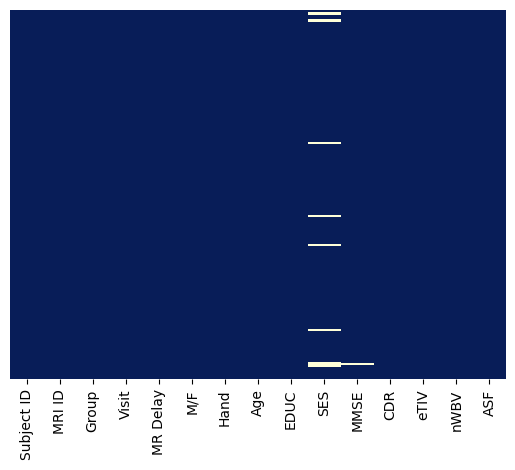

In [6]:
# Visualizing the count of missing values present in the dataset
sns.heatmap(df.isna(), yticklabels = False, cbar = False, cmap = "YlGnBu_r")

In [7]:
# Creating a dataframe which consists of records having missing values in any of its attributes
df1 = df[df.isna().any(axis = 1)]

In [8]:
df1

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357.330000,0.748085,1.292980
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1364.500000,0.727032,1.286180
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372.115333,0.709954,1.279047
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,R,80,12,NaN,30.0,0.5,1429.530000,0.736988,1.227670
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,R,81,12,NaN,27.0,0.5,1453.050000,0.721043,1.207810
207,OAS2_0099,OAS2_0099_MR1,Demented,1,0,F,R,80,12,NaN,27.0,0.5,1474.970000,0.762489,1.189850
208,OAS2_0099,OAS2_0099_MR2,Demented,2,807,F,R,83,12,NaN,23.0,0.5,1483.779876,0.750399,1.182790


In [9]:
# Creating a dataframe which consists of records which have years of education (i.e. EDUC) = 12
df2 = df[df['EDUC'] == 12]

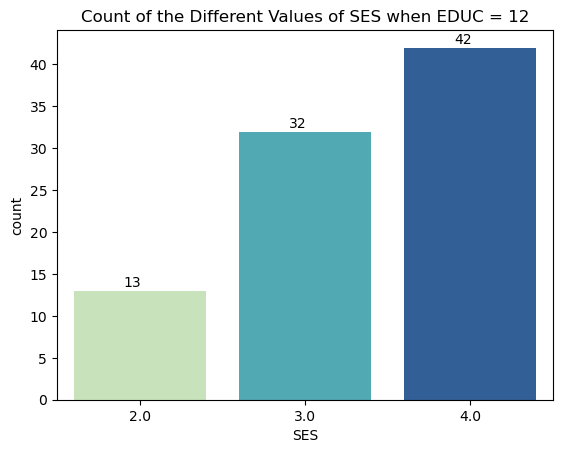

In [10]:
ax = sns.countplot(x = 'SES', data = df2, palette = 'YlGnBu')
plt.title('Count of the Different Values of SES when EDUC = 12')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.5))
plt.show()

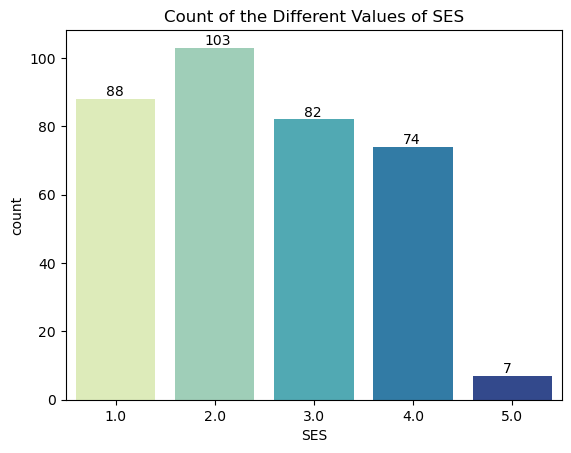

In [11]:
ax = sns.countplot(x = 'SES', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of SES')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.8))
plt.show()

In [12]:
# Creating a dataframe which consists of records which have years of education (i.e. EDUC) = 16
df2 = df[(df['EDUC'] == 16)]

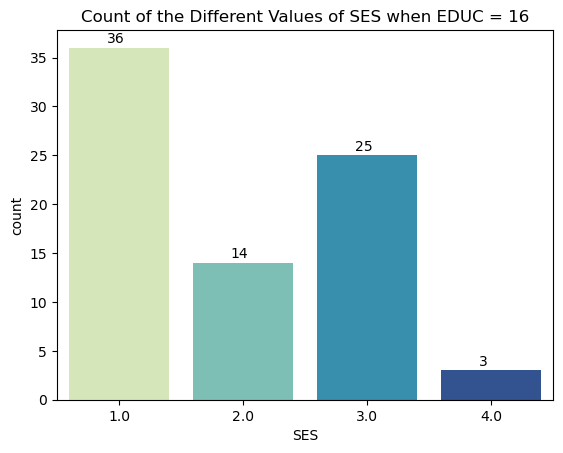

In [13]:
ax = sns.countplot(x = 'SES', data = df2, palette = 'YlGnBu')
plt.title('Count of the Different Values of SES when EDUC = 16')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.5))
plt.show()

In [14]:
# Creating a dataframe which consists of records which have CDR = 1, gender = female, dominant hand = right and years of 
# education (i.e. EDUC) = 12 since these are the common attribute values for the records having missing MMSE values
df3 = df[(df['CDR'] == 1.0) & (df['M/F'] == 'F') & (df['Hand'] == 'R') & (df['EDUC'] == 12)]

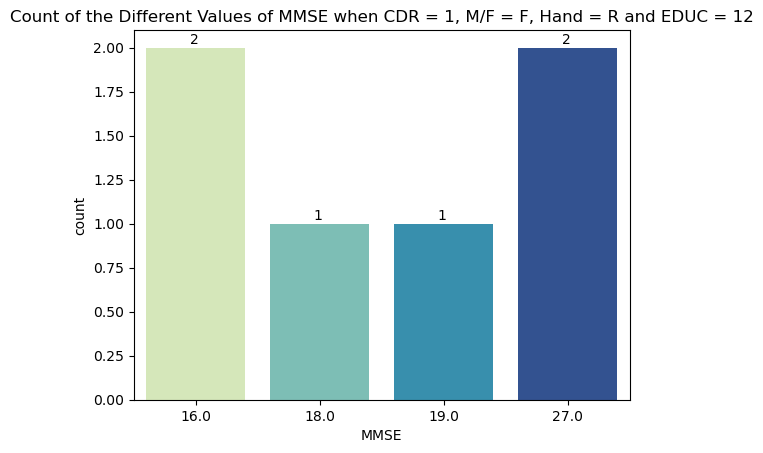

In [15]:
ax = sns.countplot(x = 'MMSE', data = df3, palette = 'YlGnBu')
plt.title('Count of the Different Values of MMSE when CDR = 1, M/F = F, Hand = R and EDUC = 12')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 0.02))
plt.show()

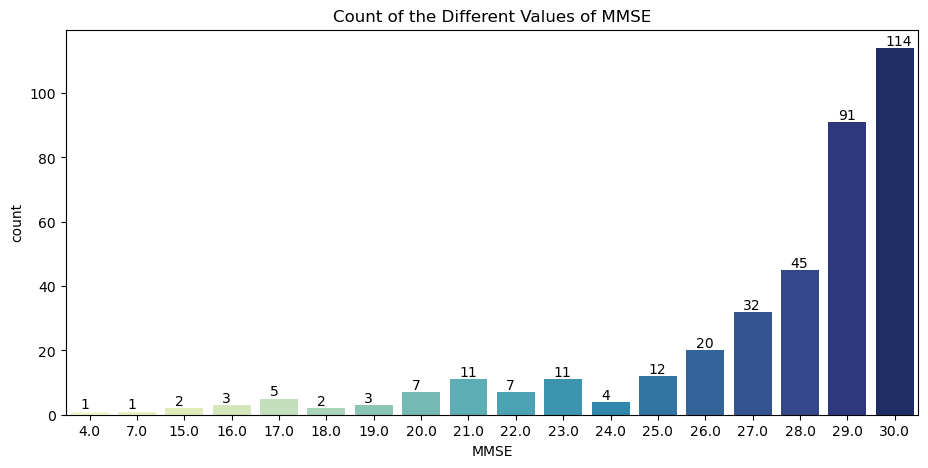

In [16]:
plt.figure(figsize = (11,5))
ax = sns.countplot(x = 'MMSE', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of MMSE')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.2, p.get_height() + 0.9))
plt.show()

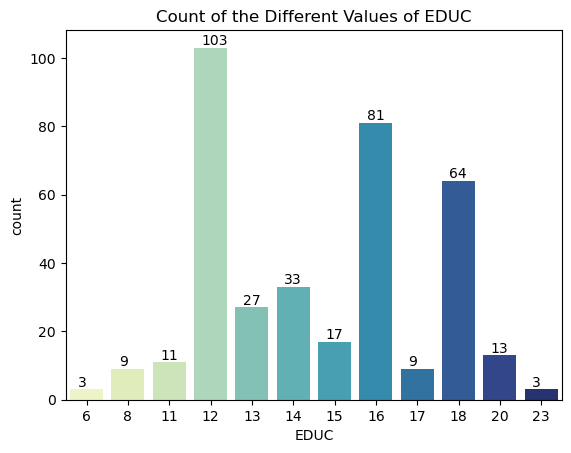

In [17]:
ax = sns.countplot(x = 'EDUC', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of EDUC')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.18, p.get_height() + 0.8))
plt.show()

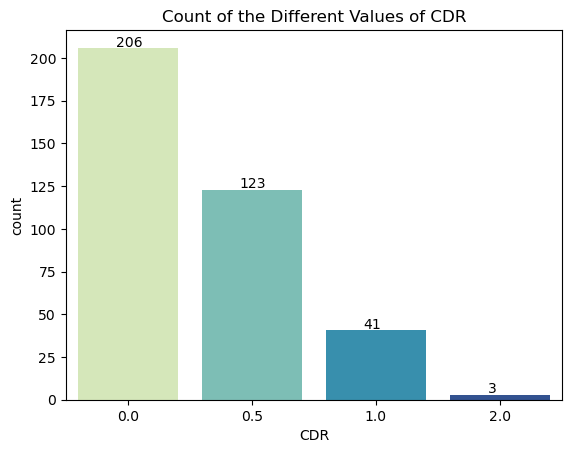

In [18]:
ax = sns.countplot(x = 'CDR', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of CDR')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.8))
plt.show()

In [19]:
# Creating a function for imputing the missing MMSE values
def addMMSE(cols):
    MMSE = cols[0]    
    if pd.isnull(MMSE):
      y = random.randint(1, 6)
      if y < 3:
        return 16.0
      elif y < 5:
        return 27.0
      elif y == 5:
        return 18.0 
      else:
        return 19.0
    else:
        return MMSE

In [20]:
# Imputing missing MMSE values in the dataset
df['MMSE'] = df[['MMSE']].apply(addMMSE, axis = 1)

In [21]:
# Creating a function for imputing the missing SES values
def addSES(cols):
    SES = cols[0]
    EDUC = cols[1]
    if pd.isnull(SES):
      if EDUC == 12:
        x = random.randint(1, 87)
        if x < 43:
          return 4.0 
        elif x < 75:
          return 3.0
        else: 
          return 2.0
      else:  
        x = random.randint(1, 38)
        if x < 25:
          return 3.0
        else:
          return 2.0
    else:
      return SES

In [22]:
# # Imputing missing SES values in the dataset
df['SES'] = df[['SES','EDUC']].apply(addSES, axis = 1)

In [23]:
# Checking whether imputation has been done properly and no other null values have been missed out
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    float64
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(6), int64(4), object(5)
memory usage: 43.8+ KB


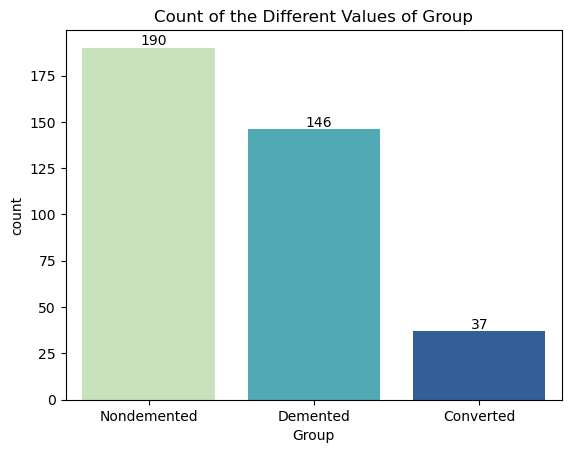

In [24]:
ax = sns.countplot(x = 'Group', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of Group')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 1.5))
plt.show()

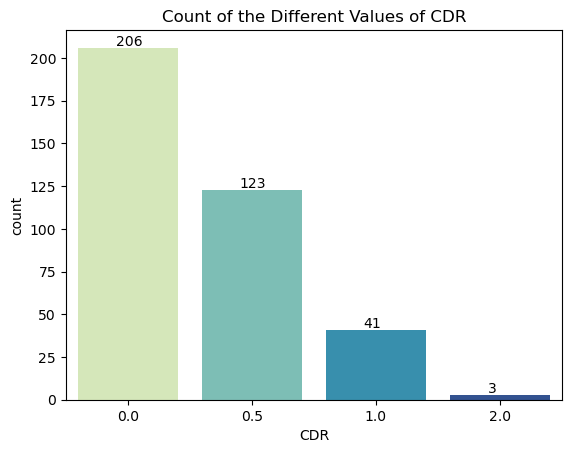

In [25]:
ax = sns.countplot(x = 'CDR', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of CDR')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1.2))
plt.show()

In [26]:
# Creating a new attribute 'Have_Alzheimers' which uses CDR to classify whether a patient has Alzheimer's Disease or not
df['Have_Alzeheimers'] = np.where(df['CDR'] > 0.5, 'Yes', 'No')

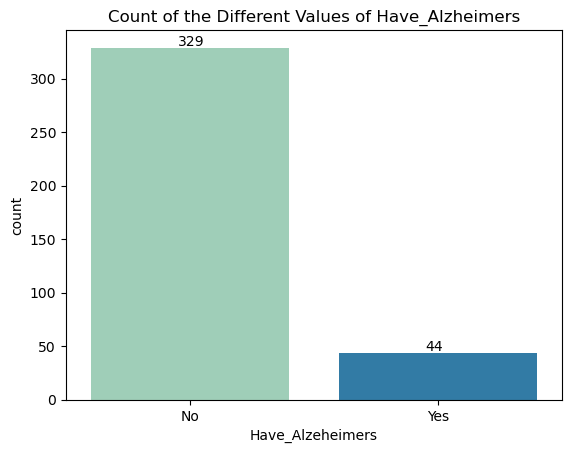

In [27]:
ax = sns.countplot(x = 'Have_Alzeheimers', data = df, palette = 'YlGnBu')
plt.title('Count of the Different Values of Have_Alzheimers')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 2))
plt.show()

In [28]:
# Separating the categorical and numerical attributes
cat_df = df.select_dtypes(include = ['object'])
cat_df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'M/F', 'Hand', 'Have_Alzeheimers'], dtype='object')

In [29]:
num_df = df.select_dtypes(exclude = ['object'])
num_df.columns

Index(['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF'],
      dtype='object')

<AxesSubplot:>

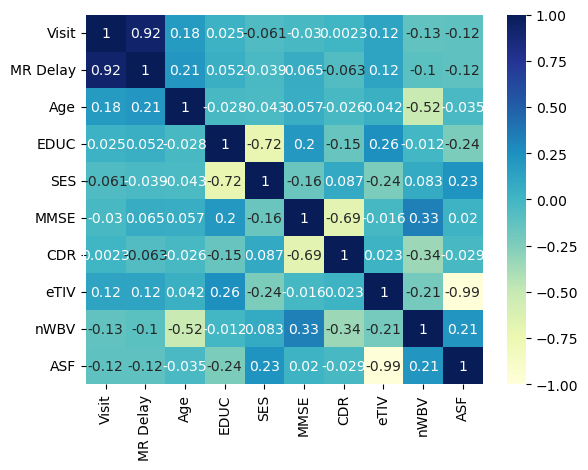

In [30]:
# Finding the correlation between the numerical attributes present in the dataset
sns.heatmap(num_df.corr(), annot = True, cmap = 'YlGnBu', vmin = -1, vmax = 1)

In [31]:
# Using label encoder to encode the categorical attributes
ls = LabelEncoder()

encoded = ls.fit(df['Group'])
fin_encoded = ls.transform(df['Group'])
df['Group'] = fin_encoded
cat_df['Group'] = fin_encoded

encoded = ls.fit(df['Have_Alzeheimers'])
fin_encoded = ls.transform(df['Have_Alzeheimers'])
df['Have_Alzeheimers'] = fin_encoded
cat_df['Have_Alzeheimers'] = fin_encoded

encoded = ls.fit(df['Hand'])
fin_encoded = ls.transform(df['Hand'])
df['Hand'] = fin_encoded
cat_df['Hand'] = fin_encoded

encoded = ls.fit(df['M/F'])
fin_encoded = ls.transform(df['M/F'])
df['M/F'] = fin_encoded
cat_df['M/F'] = fin_encoded

In [32]:
# Dropping the irrelevant attributes
df = df.drop(['Subject ID', 'MRI ID'], axis = 1)
cat_df = cat_df.drop(['Subject ID', 'MRI ID'], axis = 1)

In [33]:
# Displaying dataset after data preprocessing
df

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Have_Alzeheimers
0,2,1,0,1,0,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440,0
1,2,2,457,1,0,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539,0
2,1,1,0,1,0,75,12,3.0,23.0,0.5,1678.290000,0.736336,1.045710,0
3,1,2,560,1,0,76,12,2.0,28.0,0.5,1737.620000,0.713402,1.010000,0
4,1,3,1895,1,0,80,12,3.0,22.0,0.5,1697.911134,0.701236,1.033623,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,842,1,0,82,16,1.0,28.0,0.5,1692.880000,0.693926,1.036690,0
369,1,3,2297,1,0,86,16,1.0,26.0,0.5,1688.009649,0.675457,1.039686,0
370,2,1,0,0,0,61,13,2.0,30.0,0.0,1319.020000,0.801006,1.330540,0
371,2,2,763,0,0,63,13,2.0,30.0,0.0,1326.650000,0.795981,1.322890,0


In [34]:
# Finding the correlation between the categorical attributes and dementia using tetrachoric correlation
print("Tetrachoric Correlation for Dementia\n")
for column in cat_df.columns:
    print(column, end = ': ')
    print(mcc(cat_df['Group'], cat_df[column]))

Tetrachoric Correlation for Dementia

Group: 1.0
M/F: 0.13228080001093104
Hand: 0.0
Have_Alzeheimers: 0.24084664084322163


In [35]:
# Finding the correlation between the categorical attributes and alzheimer's disease using tetrachoric correlation
print("Tetrachoric Correlation for Alzheimer's Disease\n")
for column in cat_df.columns:
    print(column, end = ': ')
    print(mcc(cat_df['Have_Alzeheimers'], cat_df[column]))

Tetrachoric Correlation for Alzheimer's Disease

Group: 0.24084664084322163
M/F: 0.06928903925703905
Hand: 0.0
Have_Alzeheimers: 1.0


In [36]:
# Finding the correlation between the numerical attributes and dementia using point biserial correlation
print("Point Biserial Correlation for Dementia\n")
for column in num_df.columns:
    print(column, end = ': ')
    print(stats.pointbiserialr(df['Group'], num_df[column]))  

Point Biserial Correlation for Dementia

Visit: PointbiserialrResult(correlation=0.048434342806104626, pvalue=0.3509075067314852)
MR Delay: PointbiserialrResult(correlation=0.049261865195138144, pvalue=0.34272869383113064)
Age: PointbiserialrResult(correlation=-0.04926747953322946, pvalue=0.34267362233387005)
EDUC: PointbiserialrResult(correlation=0.1006060768050919, pvalue=0.05220580130171562)
SES: PointbiserialrResult(correlation=0.037269001780064134, pvalue=0.47299319354605657)
MMSE: PointbiserialrResult(correlation=0.3408528912012585, pvalue=1.3377407721489249e-11)
CDR: PointbiserialrResult(correlation=-0.5725179579477384, pvalue=7.253831471020332e-34)
eTIV: PointbiserialrResult(correlation=0.056530907836325306, pvalue=0.27615399785886496)
nWBV: PointbiserialrResult(correlation=0.25768056923859056, pvalue=4.5259978957135775e-07)
ASF: PointbiserialrResult(correlation=-0.04284097799953988, pvalue=0.40937245359224517)


In [37]:
# Finding the correlation between the numerical attributes and alzheimer's disease using point biserial correlation
print("Point Biserial Correlation for Alzheimer's Disease\n")
for column in num_df.columns:
    print(column, end = ': ')
    print(stats.pointbiserialr(df['Have_Alzeheimers'], num_df[column]))

Point Biserial Correlation for Alzheimer's Disease

Visit: PointbiserialrResult(correlation=0.04680879357431726, pvalue=0.3673289504281377)
MR Delay: PointbiserialrResult(correlation=-0.06754620849414483, pvalue=0.19303864281311928)
Age: PointbiserialrResult(correlation=-0.08124383221983125, pvalue=0.1172543133048658)
EDUC: PointbiserialrResult(correlation=-0.06164713526561853, pvalue=0.23493673383170316)
SES: PointbiserialrResult(correlation=0.003933774589449587, pvalue=0.939642578380721)
MMSE: PointbiserialrResult(correlation=-0.619009787764496, pvalue=7.919525195240412e-41)
CDR: PointbiserialrResult(correlation=0.7599417966137437, pvalue=2.108571851861145e-71)
eTIV: PointbiserialrResult(correlation=0.026396551967971412, pvalue=0.6113274216569777)
nWBV: PointbiserialrResult(correlation=-0.26683314126981506, pvalue=1.6836233347437998e-07)
ASF: PointbiserialrResult(correlation=-0.03091419352458676, pvalue=0.5517160833211191)


In [38]:
# Creating function to detect outliers
# Only the attributes which contain multiple outliers are returned by the function
def detect_outliers(df2,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df2[c],25)
        # 3rd quartile
        Q3 = np.percentile(df2[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5

        # Detecting outliers and their indices
        outlier_list_col = df2[(df2[c] < Q1 - outlier_step) | (df2[c] > Q3 + outlier_step)].index
        # Storing the indices
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [39]:
# Calling the above function in order to detect outliers in the dataset
L = detect_outliers(num_df,num_df.columns)
print(L)

[]


In [40]:
# Splitting the dataset attributes into target attributes (i.e. y1 & y2) and predictor attributes (x)
y1 = df['Group'].values
y2 = df['Have_Alzeheimers'].values

x = df.drop(['Group', 'Have_Alzeheimers'], axis = 1).values

In [41]:
# Stratified train-test split for predicting dementia (i.e. y1)
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size = 0.25, random_state = 56, stratify = y1)

In [42]:
# Scaling the input/predictor attributes using robust scaler
rs = RobustScaler()
rs.fit(x_train)

x_train = rs.transform(x_train)
x_test = rs.transform(x_test)

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output. It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

Voting Classifier supports two types of votings:

    1. Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.

    2. Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

In [43]:
estimator = []

# Logistic regression is a data analysis technique that uses mathematics to find the relationships between two data factors. 
# It then uses this relationship to predict the value of one of those factors based on the other. The prediction usually has
# a finite number of outcomes, like yes or no.

estimator.append(('LR', LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 200)))

# The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into 
# classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is 
# called a hyperplane.

estimator.append(('SVC', SVC(gamma = 'auto', probability = True)))

# A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

estimator.append(('DTC', DecisionTreeClassifier()))

In [44]:
# Hard voting classifier for predicting dementia
vot_hard = VotingClassifier(estimators = estimator, voting = 'hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)

In [45]:
score = acs(y_test, y_pred)
print("Hard Voting Accuracy Score: ", score)
print("Confusion Matrix: \n", cm(y_test, y_pred))

Hard Voting Accuracy Score:  0.925531914893617
Confusion Matrix: 
 [[ 2  4  3]
 [ 0 37  0]
 [ 0  0 48]]


In [46]:
# Soft voting classifier for predicting dementia
vot_soft = VotingClassifier(estimators = estimator, voting = 'soft')
vot_soft.fit(x_train, y_train)
y_pred = vot_soft.predict(x_test)

In [47]:
score = acs(y_test, y_pred)
print("Soft Voting Accuracy Score: ", score)
print("Confusion Matrix: \n", cm(y_test, y_pred))

Soft Voting Accuracy Score:  0.9148936170212766
Confusion Matrix: 
 [[ 2  4  3]
 [ 1 36  0]
 [ 0  0 48]]


In [48]:
# Stratified train-test split for predicting alzheimer's disease (i.e. y2)
x_train, x_test, y_train, y_test = train_test_split(x, y2, test_size = 0.25, random_state = 56, stratify = y2)

In [49]:
# Scaling the input/predictor attributes using robust scaler
rs.fit(x_train)

x_train = rs.transform(x_train)
x_test = rs.transform(x_test)

In [50]:
estimator = []
estimator.append(('LR', LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 200)))
estimator.append(('SVC', SVC(gamma = 'auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

In [51]:
# Hard voting classifier for predicting alzheimer's disease
vot_hard = VotingClassifier(estimators = estimator, voting = 'hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)

In [52]:
score = acs(y_test, y_pred)
print("Hard Voting Accuracy Score: ", score)
print("Confusion Matrix: \n", cm(y_test, y_pred))

Hard Voting Accuracy Score:  1.0
Confusion Matrix: 
 [[83  0]
 [ 0 11]]


In [53]:
# Soft voting classifier for predicting alzheimer's disease
vot_soft = VotingClassifier(estimators = estimator, voting = 'soft')
vot_soft.fit(x_train, y_train)
y_pred = vot_soft.predict(x_test)

In [54]:
score = acs(y_test, y_pred)
print("Soft Voting Accuracy Score: ", score)
print("Confusion Matrix: \n", cm(y_test, y_pred))

Soft Voting Accuracy Score:  1.0
Confusion Matrix: 
 [[83  0]
 [ 0 11]]


In soft voting, the average probabilistic value of the class labels is calculated, i.e, the average likelihood of each class and the maximum of one is taken. However, in hard voting, the predictions are taken on face value. The maximum count of the predicted class value is taken to be the final predicted class.